# Basic example with GPN

In [ ]:
# all copied from: https://github.com/songlab-cal/gpn/blob/main/examples/ss/basic_example.ipynb

## Setup

In [1]:
import gpn.model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM, AutoTokenizer

In [2]:
model_path = "songlab/gpn-brassicales"

Example region: chr5:3566900-3567600

[UCSC Genome Browser view](https://genome.ucsc.edu/cgi-bin/hgTracks?db=hub_2660163_GCF_000001735.4&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr5%3A3566900%2D3567600&hgsid=1597075775_CFnbwi2A0U0D8AuOgfJ0LsbUXnOb)

In [3]:
seq = "CGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGT"
len(seq)

700

## Tokenization

In [4]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.get_vocab()

{'[PAD]': 0, '[UNK]': 2, 'a': 3, 't': 6, 'c': 4, 'g': 5, '[MASK]': 1}

In [5]:
input_ids = tokenizer(seq, return_tensors="pt", return_attention_mask=False, return_token_type_ids=False)["input_ids"]
print(input_ids.shape)
input_ids[0, :10]

torch.Size([1, 700])


tensor([4, 5, 5, 5, 6, 6, 3, 3, 3, 3])

## Embedding

In [6]:
model = AutoModel.from_pretrained(model_path)
model.eval();

In [7]:
with torch.no_grad():
    embedding = model(input_ids=input_ids).last_hidden_state
embedding.shape

torch.Size([1, 700, 512])

In [9]:
# Let's do a quick visualization. We'll standardize the embeddings.

In [8]:
embedding_df = pd.DataFrame(StandardScaler().fit_transform(embedding[0].numpy()))
embedding_df.index.name = "Position"
embedding_df.columns.name = "Embedding dimension"
embedding_df

Embedding dimension,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
Position,,,,,,,,,,,,,,,,,,,,,
0,-0.518088,0.541441,0.131233,1.053508,2.222628,-0.319741,3.644271,1.093818,-1.380534,0.448887,...,-1.018208,-0.878753,-0.646710,-0.062727,-0.801979,-0.035080,2.433415,0.438933,9.229932,-1.419600
1,-0.751135,0.759648,3.220162,-1.068852,2.493009,-0.625320,2.157837,2.325136,-1.241314,-0.314620,...,-0.137703,-2.056975,1.057701,2.712366,-0.671562,-0.513203,0.225546,-0.879120,3.302934,-1.078404
2,-0.710903,-0.167387,-1.117152,-0.147014,0.793041,0.568514,-1.552414,1.677340,-2.283586,-0.763815,...,5.467335,-1.575755,1.160328,-0.117525,-0.490753,0.919965,0.110476,1.463596,1.251708,0.042052
3,-1.011557,0.004416,0.785733,0.880099,-1.314013,0.547279,-0.473241,0.107973,-1.798419,-0.059564,...,1.310845,-2.385743,-0.696325,-0.386536,0.107417,1.299432,0.853752,1.123085,-0.350535,-0.640750
4,-0.082699,-0.310123,-0.716856,3.308856,-1.243264,-1.491933,1.449807,-0.811680,-0.790325,-0.326598,...,-0.745452,-1.395646,-0.916111,-0.836167,0.454242,0.024447,-1.058236,1.308296,3.921492,0.346962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.465113,0.444199,-0.359129,-0.326517,-0.762708,-0.270667,0.442168,0.046694,0.634356,-0.058325,...,0.927363,-0.005681,-0.227224,-0.692033,-0.608916,0.124921,-0.665498,-0.061753,-0.602381,0.614786
696,-0.973834,1.042630,-0.170295,-0.246929,-0.420491,-0.682758,0.149622,0.966531,0.106324,-1.136616,...,-0.626093,-0.790863,-1.010916,3.175091,0.892961,-0.206767,-0.499504,-1.133052,-0.029236,-0.962531
697,-0.493599,0.791999,-0.298589,-0.410181,-1.292572,-0.796225,0.677159,-0.334222,-2.040731,-0.447183,...,-0.239600,0.605498,-0.869040,-0.338021,-0.572182,-0.486568,-0.789857,1.470951,-0.514977,0.262317


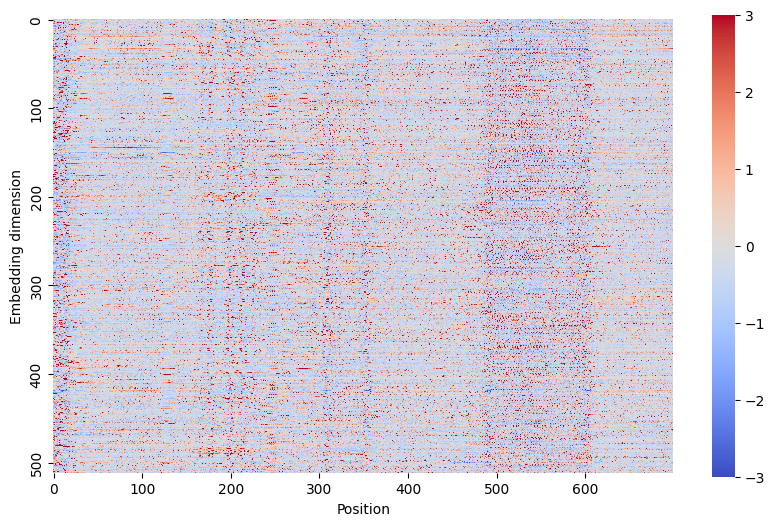

In [9]:
# If you squint you can see the exon locations :)
plt.figure(figsize=(10, 6))
sns.heatmap(embedding_df.T, center=0, vmin=-3, vmax=3, cmap="coolwarm", square=True, xticklabels=100, yticklabels=100);

## Masked language modeling

In [10]:
model_for_mlm = AutoModelForMaskedLM.from_pretrained(model_path)
model_for_mlm.eval();

In [11]:
seq[489:492]  # Start codon

'ATG'

In [12]:
pos = 489  # Let's mask the A and check the model predictions
input_ids[0, pos] = tokenizer.mask_token_id

In [13]:
input_ids
with torch.no_grad():
    all_logits = model_for_mlm(input_ids=input_ids).logits
all_logits.shape

torch.Size([1, 700, 7])

In [14]:
nucleotides = list('acgt')
logits = all_logits[0, pos, [tokenizer.get_vocab()[nc] for nc in nucleotides]]
logits

tensor([ 4.8509, -2.3441, -1.7025, -1.5116])

In [15]:
probs = torch.nn.functional.softmax(logits, dim=0).numpy()
probs

array([9.9611449e-01, 7.4742932e-04, 1.4196951e-03, 1.7183301e-03],
      dtype=float32)

<Axes: xlabel='nucleotide', ylabel='probability'>

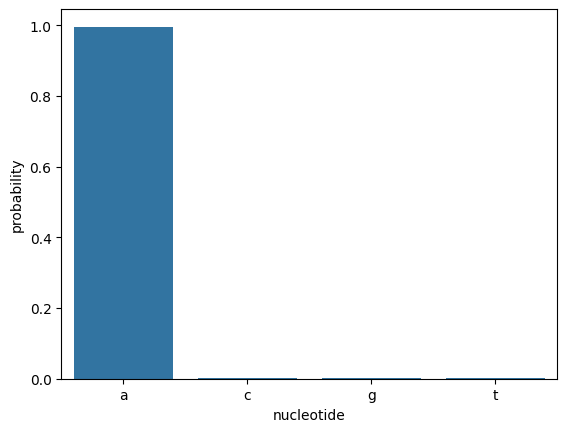

In [16]:
probs_df = pd.DataFrame(dict(nucleotide=nucleotides, probability=probs))
sns.barplot(data=probs_df, x="nucleotide", y="probability")